<img src="https://bit.ly/2VnXWr2" width="80" align="left"/>

Ironhack Data Analytics Bootcamp

<BR>

Project 1 – **Shark Attacks**, data cleaning and manipulation with Pandas
<br>
[Felipe Altermann](https://www.linkedin.com/in/felipealtermann/)
<br>
August 2021
<br>
    <hr>
<br>

> ⏰ <i>Time's short?</i>
>
> 👉 [Click here to check my presentation](https://fealt.github.io/shark-attacks-australia/), hosted by GitHub Pages ♡

<br>
<br>

**Business question to answer:**

# Where in Australia to build a **shark-free** family resort?


Case Study:
<br>
**Shark-free Hotels & Resorts** is a '*worldwide to be*' hotel chain since it's missing a branch in Australia.
- to date, all of it's other houses are build in "safe" beaches – with no sight of sharks
- main *clientèle* – all kind of families, **with** or without kids

<div>
    <img src="./images/lake_tyers_beach.jpg" width="800"/>
</div>

[Image source]()

# Global Shark Attacks Dataset: a first look

*General note: all datasets source used for this analysis are listed in the footnotes.*
<br>

In [1]:
# Setting up environment – loading packages

import geopy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from geopy.geocoders import Nominatim
from IPython.display import display_html

In [2]:
# collecting data
# csv file first look to check used separator and character encoding

pd.read_csv("./assets/attacks.csv", nrows=2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN


In [3]:
# need for a special encoding to correctly read the original csv

original_shark_df = pd.read_csv("./assets/attacks.csv", encoding="latin1")
pd.set_option("max_colwidth", 60)

In [4]:
original_shark_df.shape

(25723, 24)

In [5]:
original_shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
original_shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
original_shark_df.isnull().sum().sort_values(ascending=False)

Unnamed: 22               25722
Unnamed: 23               25721
Time                      22775
Species                   22259
Age                       22252
Sex                       19986
Activity                  19965
Location                  19961
Fatal (Y/N)               19960
Area                      19876
Name                      19631
Country                   19471
Injury                    19449
Investigator or Source    19438
Type                      19425
Year                      19423
href formula              19422
Date                      19421
pdf                       19421
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Case Number               17021
dtype: int64

In [8]:
# source csv file contains almost 3/4 of empty rows

original_shark_df[original_shark_df.duplicated(keep=False)].head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# drop empty rows

original_shark_df.drop_duplicates(inplace=True)

In [10]:
original_shark_df.shape

(6312, 24)

In [11]:
original_shark_df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [12]:
original_shark_df.columns = original_shark_df.columns.str.lower()

In [13]:
original_shark_df.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex ', 'age', 'injury', 'fatal (y/n)', 'time',
       'species ', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'unnamed: 22',
       'unnamed: 23'],
      dtype='object')

In [14]:
# keeping usefull columns only

shark_df = (
    original_shark_df[
        [
            "case number",
            "type",
            "country",
            "area",
            "location",
            "sex ",
            "age",
            "fatal (y/n)",
            "href formula",
        ]
    ]
    .copy()
    .reset_index()
)

In [15]:
shark_df.head(2)

,index,case number,type,country,area,location,sex,age,fatal (y/n),href formula
0,0,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",F,57,N,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
1,1,2018.06.18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",F,11,N,http://sharkattackfile.net/spreadsheets/pdf_directory/20...


In [16]:
shark_df["case number"] = shark_df["case number"].astype(str)

In [17]:
shark_df["year"] = shark_df["case number"].str[0:4]
shark_df["month"] = shark_df["case number"].str[5:7]
shark_df.drop(["case number"], axis=1, inplace=True)

In [18]:
# rename important columns

shark_df = shark_df.rename(
    columns={"sex ": "sex", "fatal (y/n)": "fatal", "href formula": "link"}
)

In [19]:
shark_df.head(2)

,index,type,country,area,location,sex,age,fatal,link,year,month
0,0,Boating,USA,California,"Oceanside, San Diego County",F,57,N,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018,06
1,1,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",F,11,N,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018,06


In [20]:
# reorder columns

shark_df = shark_df[
    [
        "year",
        "month",
        "type",
        "country",
        "area",
        "location",
        "sex",
        "age",
        "fatal",
        "link",
    ]
]

In [21]:
shark_df.head(2)

,year,month,type,country,area,location,sex,age,fatal,link
0,2018,06,Boating,USA,California,"Oceanside, San Diego County",F,57,N,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
1,2018,06,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",F,11,N,http://sharkattackfile.net/spreadsheets/pdf_directory/20...


In [22]:
shark_df.isnull().sum().sort_values(ascending=False)

age         2841
sex          575
location     550
fatal        549
area         465
country       60
type          14
link          11
year           0
month          0
dtype: int64

# Cleaning important columns – Worldwide analysis

In [23]:
shark_df.columns

Index(['year', 'month', 'type', 'country', 'area', 'location', 'sex', 'age',
       'fatal', 'link'],
      dtype='object')

## Column *'country'*

In [24]:
def try_str(value):
    """Transform column values to string."""

    try:
        return str(value)
    except:
        return np.nan

In [25]:
shark_df["country"] = shark_df["country"].map(try_str)

In [26]:
shark_df["country"] = shark_df["country"].str.lower()
shark_df["country"] = shark_df["country"].str.strip()
shark_df["country"].fillna("unknown", inplace=True)

In [27]:
# worldwide number of shark attacks by country

shark_country_ww = pd.DataFrame(
    shark_df["country"].value_counts(ascending=False).head(202).reset_index()
)
shark_country_ww = shark_country_ww.rename(
    columns={"index": "country", "country": "total_attacks"}
)
shark_country_ww

,country,total_attacks
0,usa,2229
1,australia,1338
2,south africa,579
3,papua new guinea,134
4,new zealand,128
...,...,...
197,solomon islands / vanuatu,1
198,bay of bengal,1
199,british virgin islands,1
200,bangladesh,1


In [28]:
# top 10 countries shows a clear top position for australia

shark_country_top_10 = shark_country_ww.loc[0:9, :]
shark_country_top_10

,country,total_attacks
0,usa,2229
1,australia,1338
2,south africa,579
3,papua new guinea,134
4,new zealand,128
5,brazil,112
6,bahamas,109
7,mexico,90
8,italy,71
9,fiji,65


![](./images/au_plot_01.png)

In [29]:
shark_country_top_3 = shark_country_ww.loc[0:2, :].reset_index()
shark_country_top_3["relation_to_mean"] = pd.qcut(
    shark_country_top_3.total_attacks, 2, ["below", "above"]
)

In [30]:
shark_country_top_3

,index,country,total_attacks,relation_to_mean
0,0,usa,2229,above
1,1,australia,1338,below
2,2,south africa,579,below


In [31]:
print("")
print(
    f"\033[0;43m Australia shark attacks (= {shark_country_top_3.total_attacks[1]}) is almost equal to the mean (= {int(shark_country_top_3.total_attacks.mean())}) of the top 3 countries. "
)
print("")


 Australia shark attacks (= 1338) is almost equal to the mean (= 1382) of the top 3 countries. 



## Column *'sex'*

- creating a **new legend**:
    - m = Male
    - f = Female
    - N/A = Missing

In [32]:
dict(shark_df["sex"].value_counts(ascending=False))

{'M': 5094, 'F': 637, 'M ': 2, 'N': 2, '.': 1, 'lli': 1}

In [33]:
shark_df["sex"] = shark_df["sex"].str.lower()
shark_df["sex"].fillna("Missing", inplace=True)
shark_df.replace(
    {"sex": {"m ": "Male", "n": "Male", ".": "Missing", "lli": "Missing"}}, inplace=True
)
shark_df.replace({"sex": {"m": "Male", "f": "Female"}}, inplace=True)

In [34]:
def try_int(value):
    """Transform column values to integer."""

    try:
        return int(value)
    except:
        return np.nan

In [35]:
shark_sex_ww = pd.DataFrame(shark_df["sex"].value_counts(ascending=False).reset_index())
shark_sex_ww = shark_sex_ww.rename(columns={"index": "sex", "sex": "total"})
shark_sex_ww

,sex,total
0,Male,5098
1,Female,637
2,Missing,577


![](./images/au_plot_02.png)

## Column *'fatal'*

- creating a **new legend**:
    - n = No
    - y = Yes
    - N/A = Missing

In [36]:
dict(shark_df["fatal"].value_counts(ascending=False))

{'N': 4293,
 'Y': 1388,
 'UNKNOWN': 71,
 ' N': 7,
 'M': 1,
 'y': 1,
 '2017': 1,
 'N ': 1}

In [37]:
shark_df["fatal"] = shark_df["fatal"].str.lower()
shark_df["fatal"].fillna("Missing", inplace=True)
shark_df.replace(
    {
        "fatal": {
            " n": "No",
            "n ": "No",
            "m": "No",
            "2017": "Missing",
            "unknown": "Missing",
        }
    },
    inplace=True,
)
shark_df.replace({"fatal": {"n": "No", "y": "Yes"}}, inplace=True)

In [38]:
shark_fatal_ww = pd.DataFrame(
    shark_df["fatal"].value_counts(ascending=False).reset_index()
)
shark_fatal_ww = shark_fatal_ww.rename(columns={"index": "is_fatal", "fatal": "total"})
shark_fatal_ww

,is_fatal,total
0,No,4302
1,Yes,1389
2,Missing,621


In [39]:
sex_list = ["Female", "Male"]
dead_list = pd.Series(
    data=[
        len(shark_df[(shark_df.sex == "Female") & (shark_df.fatal == "Yes")]),
        len(shark_df[(shark_df.sex == "Male") & (shark_df.fatal == "Yes")]),
    ],
    index=sex_list,
)
survival_list = pd.Series(
    data=[
        len(shark_df[(shark_df.sex == "Female") & (shark_df.fatal == "No")]),
        len(shark_df[(shark_df.sex == "Male") & (shark_df.fatal == "No")]),
    ],
    index=sex_list,
)
shark_fatal_ww_1 = pd.DataFrame({"died": dead_list, "survived": survival_list})
shark_fatal_ww_1["dead_ratio"] = round(
    (shark_fatal_ww_1.died / shark_fatal_ww_1.died.sum()) * 100, 2
)
shark_fatal_ww_1["survival_ratio"] = round(
    (shark_fatal_ww_1.survived / shark_fatal_ww_1.survived.sum()) * 100, 2
)
shark_fatal_ww_1.sort_index(axis=1)

,dead_ratio,died,survival_ratio,survived
Female,8.35,107,11.84,468
Male,91.65,1174,88.16,3484


# Australia

<div>
    <img src="./images/au_for_kids.jpg" width="800"/>
</div>

[Image source](https://mgschweers.files.wordpress.com/2013/11/austmapposterdone.jpg)

In [40]:
# creat new DF for Australia analysis

shark_au = shark_df[shark_df["country"] == "australia"].copy()
shark_au = shark_au.drop(columns=["country"])
shark_au.reset_index(drop=True, inplace=True)

# inspecting the new DF
shark_au.head()

,year,month,type,area,location,sex,age,fatal,link
0,2018,06,Unprovoked,New South Wales,Arrawarra Headland,Male,NaN,No,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
1,2018,06,Unprovoked,New South Wales,"Flat Rock, Ballina",Male,NaN,No,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
2,2018,05,Provoked,Queensland,Cairns Aquarium,Male,32,No,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
3,2018,05,Provoked,Westerm Australia,Dugong Bay,Female,34,No,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
4,2018,05,Questionable,New South Wales,"Sharpes Beach, Ballina",Male,NaN,No,http://sharkattackfile.net/spreadsheets/pdf_directory/20...


In [41]:
shark_au.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      1338 non-null   object
 1   month     1338 non-null   object
 2   type      1337 non-null   object
 3   area      1324 non-null   object
 4   location  1294 non-null   object
 5   sex       1338 non-null   object
 6   age       724 non-null    object
 7   fatal     1338 non-null   object
 8   link      1337 non-null   object
dtypes: object(9)
memory usage: 94.2+ KB


In [42]:
shark_au.shape

(1338, 9)

In [43]:
shark_au["type"] = shark_au["type"].str.lower()
shark_au["area"] = shark_au["area"].str.lower()
shark_au["location"] = shark_au["location"].str.lower()

In [44]:
shark_au.isnull().sum().sort_values(ascending=False)

age         614
location     44
area         14
type          1
link          1
year          0
month         0
sex           0
fatal         0
dtype: int64

## Column *'year'*

- checking values and start cleaning

In [45]:
print(dict(shark_au["year"].value_counts(ascending=False)))

{'2016': 32, '2015': 31, '2014': 29, '2009': 28, '2012': 26, '2017': 24, '1929': 24, '1961': 24, '2018': 23, '1960': 21, '1936': 21, '2005': 21, '2008': 20, '2013': 20, '2011': 20, '1962': 20, '1959': 20, '2007': 19, '1937': 18, '2010': 18, '2000': 18, '1935': 17, '1966': 17, '2004': 17, '1934': 16, '1949': 15, '2006': 14, '1923': 14, '1975': 14, '2001': 13, '1989': 13, '2002': 13, '1950': 13, '1947': 13, 'ND.0': 13, '1933': 12, '1996': 12, '1953': 12, '1963': 11, '1946': 11, '1927': 11, '1930': 10, '1932': 10, '1997': 10, '1967': 10, '1940': 10, '1956': 10, '2003': 10, '1972': 10, '1977': 9, '1990': 9, '1922': 9, '1955': 9, '1928': 9, '1969': 9, '1964': 9, '1939': 9, '1938': 9, '1951': 9, '1931': 9, '1877': 8, '1942': 8, '1916': 8, '1995': 8, '1968': 8, '1957': 7, '1971': 7, '1988': 7, '1991': 7, '1920': 7, '1993': 7, '1919': 7, '1915': 6, '1992': 6, '1895': 6, '1954': 6, '1905': 6, '1921': 6, '1882': 6, '1886': 6, '1948': 6, '1924': 6, '1952': 5, '1888': 5, '1976': 5, '1986': 5, '195

In [46]:
# line can be deleted; it's a register from a "possible" first shark attack in Australia ca. 2000 years ago

shark_au[shark_au["year"] == "0005"]

,year,month,type,area,location,sex,age,fatal,link
1321,0005,00,unprovoked,new south wales,bondi,Male,NaN,No,http://sharkattackfile.net/spreadsheets/pdf_directory/00...


In [47]:
shark_au.drop(1321, inplace=True)

In [48]:
# found the df missing dates in the linked pdf (link column)

shark_au[shark_au["year"] == "ND-0"]

,year,month,type,area,location,sex,age,fatal,link
1322,ND-0,39,unprovoked,queensland,boonooroo,Female,15,No,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1323,ND-0,38,unprovoked,queensland,moreton bay,Male,NaN,Yes,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1324,ND-0,16,unprovoked,NaN,NaN,Male,NaN,No,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...


In [49]:
shark_au.at[1322, ["year", "month"]] = ["1880", "03"]
shark_au.at[1323, ["year", "month"]] = ["1909", "01"]
shark_au.at[1324, ["year", "month"]] = ["1936", "01"]

In [50]:
# found some of the df missing dates in the linked pdf (link column)
# for dates not found lines will be deleted: indexes 1326, 1328 and 1337

shark_au[shark_au["year"] == "ND.0"]

,year,month,type,area,location,sex,age,fatal,link
1325,ND.0,04,unprovoked,torres strait,NaN,Male,NaN,No,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1326,ND.0,75,unprovoked,torres strait,NaN,Male,NaN,No,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1327,ND.0,74,unprovoked,western australia,cossack creek,Male,NaN,No,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1328,ND.0,42,unprovoked,torres strait,thursday island?,Male,NaN,No,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1329,ND.0,25,unprovoked,new south wales,"spectacle island, port jackson",Male,NaN,Missing,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1330,ND.0,22,unprovoked,NaN,NaN,Male,NaN,No,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1331,ND.0,20,unprovoked,queensland,great barrier reef,Male,NaN,Yes,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1332,ND.0,09,unprovoked,NaN,NaN,Male,NaN,Yes,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1333,ND.0,08,unprovoked,NaN,NaN,Male,NaN,Yes,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1334,ND.0,07,unprovoked,NaN,NaN,Male,NaN,Yes,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...


In [51]:
shark_au.drop([1326, 1328, 1337], inplace=True)
shark_au.at[1325, ["year", "month"]] = ["1950", "00"]
shark_au.at[1327, ["year", "month"]] = ["1931", "00"]
shark_au.at[1329, ["year", "month"]] = ["1925", "00"]
shark_au.at[1330, ["year", "month"]] = ["1878", "00"]
shark_au.at[1331, ["year", "month"]] = ["1921", "00"]
shark_au.at[[1332, 1333, 1334], ["year", "month"]] = ["1905", "00"]
shark_au.at[[1335, 1336], ["year", "month"]] = ["1902", "00"]

In [52]:
shark_au = shark_au.reset_index()

In [53]:
shark_au.dtypes.value_counts()

object    9
int64     1
dtype: int64

### Amount of attacks – by year

Key findings:
- 2016 worst year in history of records
- 230 years of records; 180 unique
- shark attacks exploded recently, top 10 include: 2016, 2015, 2014, 2009, 2012, 2017 and 2018

In [54]:
shark_au_year = pd.DataFrame(shark_au.year.value_counts(ascending=False).reset_index())
shark_au_year = shark_au_year.rename(columns={"index": "year", "year": "total"})
shark_au_year

,year,total
0,2016,32
1,2015,31
2,2014,29
3,2009,28
4,2012,26
...,...,...
175,1894,1
176,1904,1
177,1917,1
178,1970,1


In [55]:
df1_styler = (
    shark_au_year.loc[0:14, :]
    .style.set_table_attributes("style='display:inline'")
    .set_caption("Slice 1")
)
df2_styler = (
    shark_au_year.loc[15:29, :]
    .style.set_table_attributes("style='display:inline'")
    .set_caption("Slice 2")
)
df3_styler = (
    shark_au_year.loc[30:44, :]
    .style.set_table_attributes("style='display:inline'")
    .set_caption("Slice 3")
)
df4_styler = (
    shark_au_year.loc[45:59, :]
    .style.set_table_attributes("style='display:inline'")
    .set_caption("Slice 4")
)
df5_styler = (
    shark_au_year.loc[60:74, :]
    .style.set_table_attributes("style='display:inline'")
    .set_caption("Slice 5")
)
df6_styler = (
    shark_au_year.loc[75:89, :]
    .style.set_table_attributes("style='display:inline'")
    .set_caption("Slice 6")
)

space = "\xa0" * 5
display_html(
    df1_styler._repr_html_()
    + space
    + df2_styler._repr_html_()
    + space
    + df3_styler._repr_html_()
    + space
    + df4_styler._repr_html_()
    + space
    + df5_styler._repr_html_()
    + space
    + df6_styler._repr_html_(),
    raw=True,
)

,year,total
0,2016,32
1,2015,31
2,2014,29
3,2009,28
4,2012,26
5,2017,24
6,1929,24
7,1961,24
8,2018,23
9,1936,22


### Amount of attacks – grouped by (see graphics)

Key findings:
- new millennium brought shocking growth in shark attacks

In [56]:
shark_au_year_1 = shark_au_year.copy()
shark_au_year_1["year_groups"] = pd.cut(
    shark_au_year_1["year"].astype(int),
    [1788, 1918, 1943, 1968, 1978, 1988, 1998, 2008, 2018],
)

In [57]:
shark_au_year_1

,year,total,year_groups
0,2016,32,"(2008, 2018]"
1,2015,31,"(2008, 2018]"
2,2014,29,"(2008, 2018]"
3,2009,28,"(2008, 2018]"
4,2012,26,"(2008, 2018]"
...,...,...,...
175,1894,1,"(1788, 1918]"
176,1904,1,"(1788, 1918]"
177,1917,1,"(1788, 1918]"
178,1970,1,"(1968, 1978]"


In [58]:
shark_au_year_group = shark_au_year_1.groupby(by="year_groups").sum().reset_index()
shark_au_year_group["years_grouped"] = [130, 25, 25, 10, 10, 10, 10, 10]
shark_au_year_group

,year_groups,total,years_grouped
0,"(1788, 1918]",220,130
1,"(1918, 1943]",261,25
2,"(1943, 1968]",272,25
3,"(1968, 1978]",67,10
4,"(1978, 1988]",34,10
5,"(1988, 1998]",80,10
6,"(1998, 2008]",148,10
7,"(2008, 2018]",251,10


In [59]:
# convert year to pandas datetime
shark_au_year_copy = shark_au_year.copy()
shark_au_year_copy["year"] = shark_au_year_copy["year"].astype("datetime64[ns]")

![](./images/au_plot_05.png)

## Column *'month'*

- checking values and start cleaning

Key findings:
- australia has a with range of climates; northern states are typically warm year-round
- december to february is summer, holiday season, so tons of tourists
- no surprise, top 5 months with shark attacks: january, december, february, november and march

In [60]:
print(dict(shark_au["month"].value_counts(ascending=False)))

{'01': 211, '12': 182, '02': 151, '11': 133, '03': 127, '04': 111, '10': 87, '06': 62, '05': 58, '00': 57, '09': 57, '08': 50, '07': 48}


In [61]:
shark_au["month"] = shark_au["month"].map(try_int)

In [62]:
# Legend:
# 0 = unknown

shark_au.replace(
    {
        "month": {
            "42": "0",
            "16": "0",
            "39": "0",
            "25": "0",
            "38": "0",
            "22": "0",
            "74": "0",
            "20": "0",
            "75": "0",
        }
    },
    inplace=True,
)

In [63]:
shark_au_month = pd.DataFrame(
    shark_au.month.value_counts(ascending=False).reset_index()
)
shark_au_month = shark_au_month.rename(columns={"index": "month", "month": "total"})
shark_au_month

,month,total
0,1,211
1,12,182
2,2,151
3,11,133
4,3,127
5,4,111
6,10,87
7,6,62
8,5,58
9,0,57


![](./images/au_plot_06.png)

## Column *'type'*

- checking values and start cleaning
- creating a **new legend**:
    - provoked
    - unprovoked
    - unclear
    
Key findings:
- australia has a with range of climates; northern states are typically warm year-round
- december to february is summer, holiday season, so tons of tourists
- no surprise, top 5 months with shark attacks: january, december, february, november and march

In [64]:
dict(shark_au["type"].value_counts(ascending=False))

{'unprovoked': 930,
 'provoked': 136,
 'invalid': 119,
 'boating': 83,
 'boat': 39,
 'sea disaster': 24,
 'questionable': 2}

In [65]:
shark_au.replace(
    {
        "type": {
            "invalid": "unclear",
            "boating": "unclear",
            "boat": "unclear",
            "sea disaster": "unprovoked",
            "questionable": "unclear",
        }
    },
    inplace=True,
)
shark_au["type"].fillna("unclear", inplace=True)

In [66]:
shark_au["type"] = shark_au["type"].map(try_str)

In [67]:
shark_au_type = pd.DataFrame(shark_au.type.value_counts(ascending=False).reset_index())
shark_au_type = shark_au_type.rename(columns={"index": "type", "type": "total"})
shark_au_type

,type,total
0,unprovoked,954
1,unclear,244
2,provoked,136


![](./images/au_plot_07.png)

## Column *'area'*

- checking values and start cleaning
- ran **GeoPy library** to get coordinates
    
Key findings:
- australia top touristic states: **new south wales** and **queensland**
- both end up with **64%** of shark attacks compared to the countries total

In [68]:
dict(shark_au["area"].value_counts(ascending=False))

{'new south wales': 485,
 'queensland': 311,
 'western australia': 188,
 'south australia': 104,
 'victoria': 90,
 'torres strait': 68,
 'tasmania': 41,
 'northern territory': 23,
 'westerm australia': 3,
 'victoria ': 2,
 'torres strait ': 2,
 'norfolk island': 1,
 'queensland ': 1,
 'territory of cocos (keeling) islands': 1}

In [69]:
shark_au.replace(
    {
        "area": {
            "westerm australia": "western australia",
            "victoria ": "victoria",
            "queensland ": "queensland",
            "territory of cocos (keeling) islands": "cocos islands",
            "torres strait": "queensland",
            "torres strait ": "queensland",
        }
    },
    inplace=True,
)
shark_au["area"].fillna("unknown", inplace=True)

In [70]:
shark_au["area"] = shark_au["area"].map(try_str)

In [71]:
area_dict = dict(shark_au["area"].value_counts(ascending=False))
au_area_sum = pd.DataFrame(area_dict.items(), columns=["area", "sum"])
au_area_sum["% to total"] = (
    round(au_area_sum["sum"] / au_area_sum["sum"].sum(), 2) * 100
).astype(int)
au_area_sum

,area,sum,% to total
0,new south wales,485,36
1,queensland,382,28
2,western australia,191,14
3,south australia,104,8
4,victoria,92,7
5,tasmania,41,3
6,northern territory,23,2
7,unknown,14,1
8,norfolk island,1,0
9,cocos islands,1,0


## Column *'age'*

- checking values and start cleaning
- creating a new column: `'unknown'`
    
Key findings:
- Shark attacks victims age:
    - *'Gold medal'* for 17 years old with 7% of total
    - 'Top 5' ages between 15-20 years with 20%
    - 80% range between 10 to 40 years old

In [72]:
print(dict(shark_au["age"].value_counts(ascending=False)))

{'17': 47, '18': 38, '20': 32, '19': 27, '15': 26, '21': 25, '22': 21, '25': 21, '26': 21, '13': 20, '23': 20, '24': 20, '16': 19, '31': 18, '40': 17, '29': 17, '14': 16, '27': 16, '30': 15, '32': 15, '35': 15, '28': 14, '34': 14, '38': 13, '12': 12, '41': 11, '37': 11, '10': 10, '36': 9, '42': 8, '47': 8, '52': 8, '43': 8, '11': 8, '45': 7, '55': 6, '39': 6, '50': 6, '51': 6, '49': 6, '48': 5, '44': 5, '7': 5, '33': 5, '46': 4, '62': 4, '60': 4, '59': 3, '9': 3, '69': 2, '65': 2, '57': 2, '8': 2, '61': 2, '30s': 2, '73': 2, '78': 2, '63': 2, '50s': 1, '30 or 36': 1, ' 30': 1, '50 & 30': 1, '"young"': 1, '5': 1, '40s': 1, '58': 1, ' ': 1, '30 & 32': 1, '17 & 16': 1, '17 & 35': 1, '56': 1, '  ': 1, '? & 19': 1, '75': 1, '16 to 18': 1, '33 or 37': 1, '74 ': 1, 'F': 1, 'MAKE LINE GREEN': 1, '2½': 1, 'young': 1, '45 ': 1, '31 or 33': 1, 'Both 11': 1, 'teen': 1, '64': 1, '54': 1, '71': 1, '84': 1}


In [73]:
shark_au.replace(
    {
        "age": {
            "30s": "35",
            "30 or 36": "35",
            " ": "unknown",
            "31 or 33": "32",
            "17 & 16": "17",
            "16 to 18": "17",
            "30 & 32": "31",
            "Both 11": "11",
            "50s": "55",
            "17 & 35": "unknown",
            "teen": "15",
            "F": "unknown",
            '"young"': "unknown",
            "33 or 37": "35",
            "50 & 30": "unknown",
            "74 ": "74",
            "  ": "unknown",
            "40s": "45",
            "2½": "2",
            "young": "unknown",
            "MAKE LINE GREEN": "unknown",
            " 30": "30",
            "? & 19": "unknown",
        }
    },
    inplace=True,
)
shark_au["age"].fillna("unknown", inplace=True)

In [74]:
print(dict(shark_au["age"].value_counts(ascending=False)))

{'unknown': 619, '17': 49, '18': 38, '20': 32, '19': 27, '15': 27, '21': 25, '26': 21, '22': 21, '25': 21, '23': 20, '24': 20, '13': 20, '16': 19, '31': 19, '35': 19, '40': 17, '29': 17, '14': 16, '30': 16, '32': 16, '27': 16, '34': 14, '28': 14, '38': 13, '12': 12, '41': 11, '37': 11, '10': 10, '36': 9, '11': 9, '42': 8, '47': 8, '43': 8, '45': 8, '52': 8, '55': 7, '51': 6, '50': 6, '49': 6, '39': 6, '48': 5, '44': 5, '33': 5, '7': 5, '46': 4, '60': 4, '62': 4, '9': 3, '59': 3, '8': 2, '65': 2, '63': 2, '78': 2, '57': 2, '61': 2, '69': 2, '73': 2, '5': 1, '58': 1, '2': 1, '56': 1, '54': 1, '75': 1, '45 ': 1, '71': 1, '74': 1, '64': 1, '84': 1}


In [75]:
shark_au_age = pd.DataFrame(shark_au.age.value_counts(ascending=False).reset_index())
shark_au_age = shark_au_age.rename(columns={"index": "age", "age": "sum"})
shark_au_age

,age,sum
0,unknown,619
1,17,49
2,18,38
3,20,32
4,19,27
...,...,...
64,45,1
65,71,1
66,74,1
67,64,1


In [76]:
# removing 'unknown' values
shark_au_age_1 = shark_au_age.loc[1:68, :].reset_index()
shark_au_age_1.drop(columns=["index"], inplace=True)

# creating new column with percentage
shark_au_age_1["% of total"] = (
    round(shark_au_age_1["sum"] / shark_au_age_1["sum"].sum(), 2) * 100
).astype(int)

# creating new column and sorting values into bins
shark_au_age_1["age_class"] = pd.cut(
    shark_au_age_1["age"].astype(int), [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
)

In [77]:
shark_au_age_1

,age,sum,% of total,age_class
0,17,49,7,"(10, 20]"
1,18,38,5,"(10, 20]"
2,20,32,4,"(10, 20]"
3,19,27,4,"(10, 20]"
4,15,27,4,"(10, 20]"
...,...,...,...,...
63,45,1,0,"(40, 50]"
64,71,1,0,"(70, 80]"
65,74,1,0,"(70, 80]"
66,64,1,0,"(60, 70]"


In [78]:
shark_au_age_2 = (
    shark_au_age_1.groupby(shark_au_age_1["age_class"]).sum().sort_index(ascending=True)
)
shark_au_age_2["% of total"] = (
    round(shark_au_age_2["sum"] / shark_au_age_2["sum"].sum(), 2) * 100
).astype(int)
shark_au_age_2

,sum,% of total
age_class,,
"(0, 10]",22,3
"(10, 20]",249,35
"(20, 30]",191,27
"(30, 40]",129,18
"(40, 50]",70,10
"(50, 60]",33,5
"(60, 70]",13,2
"(70, 80]",7,1
"(80, 90]",1,0


## Column *'fatal'*

- already cleaned in the worldwide section

Key findings:
- Shark attacks *fatal* figures (**not*** considering the missing values):
    - around 24% chance to die
    - around 76% to survive

In [79]:
# dead ratio considering "missing" values
shark_fatal_au = pd.DataFrame(shark_au["fatal"].value_counts(ascending=False)).reset_index()
shark_fatal_au.rename(columns={"index": "is_fatal", "fatal": "total"})
shark_fatal_au["dead_ratio_australia"] = round(
    (shark_fatal_au.fatal / shark_fatal_au.fatal.sum()) * 100, 2
)
shark_fatal_au

,index,fatal,dead_ratio_australia
0,No,918,68.82
1,Yes,282,21.14
2,Missing,134,10.04


In [80]:
# dead ratio without "missing" values
shark_fatal_au_1 = pd.DataFrame(shark_au["fatal"].value_counts(ascending=False)).reset_index()
shark_fatal_au_1 = shark_fatal_au_1.loc[0:1,:]
shark_fatal_au_1.rename(columns={"index": "is_fatal", "fatal": "total"})
shark_fatal_au_1["dead_ratio_australia"] = round(
    (shark_fatal_au_1.fatal / shark_fatal_au_1.fatal.sum()) * 100, 2
)
shark_fatal_au_1

,index,fatal,dead_ratio_australia
0,No,918,76.5
1,Yes,282,23.5


## Column *'link'*

- checking values and start cleaning
- kept this column to relate missing location data with the linked file

In [81]:
shark_au["link"].fillna("unknown", inplace=True)

### **GeoPy** code used to get `'area'` column coordinates

```python
nom = Nominatim(user_agent="shark")
geopy.geocoders.options.default_user_agent = "shark"
au_area_sum["coordinates"] = au_area_sum["area"].apply(nom.geocode)

au_area_sum["latitude"] = au_area_sum["coordinates"].apply(lambda x: x.latitude)
au_area_sum["longitude"] = au_area_sum["coordinates"].apply(lambda x: x.longitude)

au_area_sum.drop(['coordinates'], axis=1, inplace=True)
au_area_sum.loc[7,'latitude'] = 37.596094
au_area_sum.loc[7,'longitude'] = 127.906214

# export au_area_sum for futher analysis
au_area_sum.to_csv('./assets/au_area_sum.csv', sep=',')
```

In [82]:
au_area_sum = pd.read_csv("./assets/au_area_sum.csv", sep=",")
au_area_sum.drop(["Unnamed: 0"], axis=1, inplace=True)
au_area_sum

,area,sum,latitude,longitude
0,new south wales,485,-31.875984,147.286949
1,queensland,382,-22.164678,144.584490
2,western australia,191,-25.230300,121.018725
3,south australia,104,-30.534367,135.630121
4,victoria,92,-36.598610,144.678005
5,tasmania,41,-42.035067,146.636689
6,northern territory,23,-19.851610,133.230337
7,unknown,14,37.596094,127.906214
8,norfolk island,1,-29.028958,167.958729
9,cocos islands,1,-12.141876,96.867707


## Column *'location'*

Cleaning strategy:
1) add text *', australia'* to all values at *'location'* column and
   run geopy on all lines trying to get as many coordinates as possible
2) read a *'.csv'* file with australian city names to match with missed
   values from strategy #1
3) read a *'.csv'* file with australian beach names to match with missed
   values from strategy #1
4) join DF's from strategies #2 and #3 with new found locations and run
   geopy again
    
Key findings:
- australia top touristic states: **new south wales** and **queensland**
- both end up with **64%** of shark attacks compared to the countries total

In [83]:
loc_dict = dict(shark_au["location"].value_counts(ascending=False))
loc_au = pd.DataFrame(loc_dict.items(), columns=["location", "sum"])
loc_au

,location,sum
0,sydney,10
1,sydney harbor,10
2,brisbane river,9
3,near thursday island,9
4,moreton bay,8
...,...,...
971,"princess royal harbor, near king georges sound",1
972,"waitpinga beach, near victor harbor, encounter bay",1
973,off mooloolabah,1
974,the australian shark and ray centre,1


### cleaning strategy #1

1) add text `', australia'` to all values at `'location'` column and
   run geopy on all lines trying to get as many coordinates as possible

> `'loc_au'` DF splited into 2 DF's to be able to run geopy

#### First 500 lines from `'loc_au'`, named `'loc_au_h1'` (h=half)

```python
loc_au_h1 = loc_au.loc[0:499,:]
loc_au_h1['location'] = loc_au_h1['location'] + ', australia'

# run geopy on 'loc_au_h1' to get coordinates
nom = Nominatim(user_agent="shark")
geopy.geocoders.options.default_user_agent = "shark"
loc_au_h1["coordinates"] = loc_au_h1["location"].apply(nom.geocode)

# check number of missing (not found by geopy) coordinates
loc_au_h1[loc_au_h1['coordinates'].isnull() == True]

# fill missing coordinates values with 'unknown'
loc_au_h1.coordinates.fillna('unknown', inplace = True)

# split 'loc_au_h1' DF into 2 DF's; #2 with 'unknown' values
unknown_h1 = loc_au_h1.coordinates == 'unknown'
loc_au_h1_1 = loc_au_h1[~unknown_h1]
loc_au_h1_2 = loc_au_h1[unknown_h1]

# create columns to isolate 'latitude' and 'longitude' from aquired coordinates
loc_au_h1_1['latitude'] = loc_au_h1_1.coordinates.apply(lambda x: x.latitude)
loc_au_h1_1['longitude'] = loc_au_h1_1.coordinates.apply(lambda x: x.longitude)

# drop columns from 'loc_au_h1_1' DF
loc_au_h1_1 = loc_au_h1_1.drop(['sum', 'coordinates'], axis=1)

# export DF to backup
loc_au_h1_1.to_csv('./assets/loc_au_h1_1.csv', sep=',')
loc_au_h1_2.to_csv('./assets/loc_au_h1_2.csv', sep=',')
```

In [84]:
loc_au_h1_1 = pd.read_csv("./assets/loc_au_h1_1.csv", sep=",")
loc_au_h1_1.drop(["Unnamed: 0"], axis=1, inplace=True)
loc_au_h1_1

,location,latitude,longitude
0,"sydney, australia",-33.854816,151.216454
1,"sydney harbor, australia",44.015651,-121.283197
2,"brisbane river, australia",-27.160970,152.536197
3,"near thursday island, australia",-10.584409,142.219293
4,"thursday island, australia",-10.578646,142.218921
...,...,...,...
316,"yeppoon, australia",-23.134804,150.743662
317,"near schouten island, australia",-42.312608,148.278350
318,"cowes, australia",-38.470971,145.238898
319,"woy woy, australia",-33.488055,151.327493


In [85]:
loc_au_h1_2 = pd.read_csv("./assets/loc_au_h1_2.csv", sep=",")
loc_au_h1_2.drop(["Unnamed: 0"], axis=1, inplace=True)
loc_au_h1_2

,location,sum,coordinates
0,"marineland, sydney, australia",4,unknown
1,"off lodestone reef, great barrier reef, north of townsvi...",3,unknown
2,"near moreton island in moreton bay, australia",3,unknown
3,"cottesloe beach, perth, australia",3,unknown
4,"ellis beach, 20 miles from cairns, australia",2,unknown
...,...,...,...
174,"red bluff near quobba station, australia",1,unknown
175,"20 miles off sydney, australia",1,unknown
176,"garden point, woolloomooloo sydney harbour, australia",1,unknown
177,"kiah creek, eden, australia",1,unknown


#### Last 476 lines from `'loc_au'`, named `'loc_au_h2'` (h=half)

```python
loc_au_h2 = loc_au.loc[500:,:]
loc_au_h2['location'] = loc_au_h2['location'] + ', australia'

# run geopy on 'loc_au_h1' to get coordinates
nom = Nominatim(user_agent="shark")
geopy.geocoders.options.default_user_agent = "shark"
loc_au_h2["coordinates"] = loc_au_h2["location"].apply(nom.geocode)

# check number of missing (not found by geopy) coordinates
loc_au_h2[loc_au_h2['coordinates'].isnull() == True]

# fill missing coordinates values with 'unknown'
loc_au_h2.coordinates.fillna('unknown', inplace = True)

# split 'loc_au_h2' DF into 2 DF's; '..._2' with 'unknown' values
unknown_h2 = loc_au_h2.coordinates == 'unknown'
loc_au_h2_1 = loc_au_h2[~unknown_h2]
loc_au_h2_2 = loc_au_h2[unknown_h2]

# create columns to isolate 'latitude' and 'longitude' from aquired coordinates
loc_au_h2_1['latitude'] = loc_au_h2_1.coordinates.apply(lambda x: x.latitude)
loc_au_h2_1['longitude'] = loc_au_h2_1.coordinates.apply(lambda x: x.longitude)

# drop columns from 'loc_au_h1_1' DF
loc_au_h2_1 = loc_au_h2_1.drop(['sum', 'coordinates'], axis=1)

# export DF to backup
loc_au_h2_1.to_csv('./assets/loc_au_h2_1.csv', sep=',')
loc_au_h2_2.to_csv('./assets/loc_au_h2_2.csv', sep=',')
```

In [86]:
loc_au_h2_1 = pd.read_csv("./assets/loc_au_h2_1.csv", sep=",")
loc_au_h2_1.drop(["Unnamed: 0"], axis=1, inplace=True)
loc_au_h2_1

,location,latitude,longitude
0,"emerald hill, australia",-30.882819,150.107456
1,"great barrier reef , australia",-16.350000,145.900000
2,"george town cove, australia",-41.105016,146.823846
3,"point henry, australia",-38.128684,144.425681
4,"lady julia percy island, australia",-38.418740,142.001691
...,...,...,...
262,"south perth, australia",-31.997404,115.872537
263,"sam's creek area, australia",-36.373088,149.944612
264,"lismore, australia",-28.793639,153.267087
265,"native dog beach, australia",-34.453293,119.361326


In [87]:
loc_au_h2_2 = pd.read_csv("./assets/loc_au_h2_2.csv", sep=",")
loc_au_h2_2.drop(["Unnamed: 0"], axis=1, inplace=True)
loc_au_h2_2

,location,sum,coordinates
0,"urunga, belliger heads, australia",1,unknown
1,"roe reef off rottnest island, australia",1,unknown
2,"governor's reef, port phillip bay, australia",1,unknown
3,"seaspray, near sale, australia",1,unknown
4,"wreck of paddle steamer, koputai, 6 km off bondi beach, ...",1,unknown
...,...,...,...
204,"off bribie heads, australia",1,unknown
205,"winki pop, bells beach, australia",1,unknown
206,"off blacksmith beach, australia",1,unknown
207,"goolwa beach, fleurieu peninsula, australia",1,unknown


In [88]:
print("")
print(f"\033[0;43m Achievements with strategy #1 ")
print("")
print(f"\033[0;46m >> found {len(loc_au_h1_1+loc_au_h2_1)} values with coordinates ")
print("")
print(f"\033[0;41m >> found {len(loc_au_h1_2+loc_au_h2_2)} values without coordinates ")
print("")


 Achievements with strategy #1 

 >> found 321 values with coordinates 

 >> found 209 values without coordinates 



```python
# append and export (for backup) DF's with coordinates
loc_au_with_coord = loc_au_h1_1.append(loc_au_h2_1)
loc_au_with_coord.to_csv('./assets/au_backup/loc_au_with_coord.csv', sep=',')

# append and export (for backup) DF's without coordinates
loc_au_without_coord = loc_au_h1_2.append(loc_au_h2_2)
loc_au_without_coord.to_csv('./assets/au_backup/loc_au_without_coord.csv', sep=',')
```

In [89]:
loc_au_with_coord = pd.read_csv("./assets/au_backup/loc_au_with_coord.csv", sep=",")
loc_au_with_coord.drop(["Unnamed: 0"], axis=1, inplace=True)
loc_au_without_coord = pd.read_csv(
    "./assets/au_backup/loc_au_without_coord.csv", sep=","
)
loc_au_without_coord.drop(["Unnamed: 0"], axis=1, inplace=True)

### cleaning strategy #2

2) read a `'.csv'` file with australian city names to match with missed
   values from strategy #1

In [90]:
# read 'au_cities.csv' and check first DF lines
au_cities = pd.read_csv("./assets/au_cities.csv", sep=",")
au_cities.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Sydney,-33.8650,151.2094,Australia,AU,New South Wales,admin,5312163,4840600
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
2,Brisbane,-27.4678,153.0281,Australia,AU,Queensland,admin,2514184,2360241
3,Perth,-31.9522,115.8589,Australia,AU,Western Australia,admin,2059484,2039200
4,Adelaide,-34.9289,138.6011,Australia,AU,South Australia,admin,1345777,1295714


In [91]:
# check unique city names
city_list = au_cities.city.unique()
city_list

array(['Sydney', 'Melbourne', 'Brisbane', ..., 'Dunbogan', 'Tomakin',
       'Currie'], dtype=object)

In [92]:
# create a function to run in 'location' column
def checkLocation(x):
    """
    Function match location column with list of cities and stores
    result (wheter city or unknown) in a given new column.
    """
    for location in city_list:
        if location.lower() in x:
            return location
    return "unknown"

In [93]:
# run function on missing coordinates DF
loc_au_without_coord["filter"] = loc_au_without_coord.location.apply(checkLocation)

In [94]:
# split DF into 2 DF's: with coordinates
cities_with_coord = loc_au_without_coord[loc_au_without_coord["filter"] != "unknown"]
cities_with_coord.drop(["coordinates"], axis=1, inplace=True)

# split DF into 2 DF's: without coordinates
cities_without_coord = loc_au_without_coord[loc_au_without_coord["filter"] == "unknown"]
cities_without_coord.drop(["coordinates"], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [95]:
print("")
print(f"\033[0;43m Achievements with strategy #2 ")
print("")
print(f"\033[0;46m >> found {len(cities_with_coord)} values with coordinates ")
print("")
print(f"\033[0;41m >> found {len(cities_without_coord)} values without coordinates ")
print("")


 Achievements with strategy #2 

 >> found 210 values with coordinates 

 >> found 178 values without coordinates 



### cleaning strategy #3

3) read a `'.csv'` file with australian beach names to match with missed
   values from strategy #1

In [96]:
# read 'au_cities.csv' and check first DF lines

au_beaches = pd.read_csv("./assets/au_beaches.csv", sep=",")
au_beaches.head()

,country,state,city,beach_name
0,australia,new south wales,sydney,avalon beach
1,australia,new south wales,sydney,dumas beach
2,australia,new south wales,sydney,lady robinsons beach
3,australia,new south wales,sydney,bondi beach
4,australia,new south wales,sydney,coogee beach


In [97]:
# check unique city names
beaches_list = au_beaches.beach_name.unique()

In [98]:
# create a function to run in 'location' column
def checkLocation(x):
    """
    Function match location column with list of beaches and stores
    result (wheter beach name or unknown) in a given new column.
    """
    for location in beaches_list:
        if location.lower() in x:
            return location
    return "unknown"

In [99]:
# run function on missing coordinates DF
cities_without_coord["filter"] = cities_without_coord.location.apply(checkLocation)

<ipython-input-99-bbe20ec33874>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_without_coord["filter"] = cities_without_coord.location.apply(checkLocation)


In [100]:
# split DF into 2 DF's: with coordinates
beaches_with_coord = cities_without_coord[cities_without_coord["filter"] != "unknown"]
# beaches_with_coord.drop(['sum', 'filter'], axis=1, inplace=True)

# split DF into 2 DF's: without coordinates
beaches_without_coord = cities_without_coord[
    cities_without_coord["filter"] == "unknown"
]
# beaches_without_coord.drop(['sum', 'filter'], axis=1, inplace=True)

In [101]:
print("")
print(f"\033[0;43m Achievements with strategy #3 ")
print("")
print(f"\033[0;46m >> found {len(beaches_with_coord)} values with coordinates ")
print("")
print(f"\033[0;41m >> found {len(beaches_without_coord)} values without coordinates ")
print("")


 Achievements with strategy #3 

 >> found 6 values with coordinates 

 >> found 172 values without coordinates 



In [102]:
# add columns with 'unknown'value
beaches_without_coord["latitude"] = "unknown"
beaches_without_coord["longitude"] = "unknown"
beaches_without_coord = beaches_without_coord.drop(["sum", "filter"], axis=1)
beaches_without_coord

<ipython-input-102-c05bdceae1c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beaches_without_coord["latitude"] = "unknown"
<ipython-input-102-c05bdceae1c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beaches_without_coord["longitude"] = "unknown"


,location,latitude,longitude
2,"near moreton island in moreton bay, australia",unknown,unknown
6,"mornington island, gulf of carpentaria, australia",unknown,unknown
13,"the pearling beds, australia",unknown,unknown
23,"flinders, mornington penisula, australia",unknown,unknown
25,"bellambi reef, australia",unknown,unknown
...,...,...,...
382,"buddina beach, south of noosa, australia",unknown,unknown
383,"off bribie heads, australia",unknown,unknown
384,"winki pop, bells beach, australia",unknown,unknown
385,"off blacksmith beach, australia",unknown,unknown


### cleaning strategy #4

4) join DF's from strategies #2 and #3 with new found locations and run
   geopy again

In [103]:
# join DF's and add ', australia'
cities_beach = cities_with_coord.append(beaches_with_coord)

In [104]:
cities_beach

,location,sum,filter
0,"marineland, sydney, australia",4,Sydney
1,"off lodestone reef, great barrier reef, north of townsvi...",3,Townsville
3,"cottesloe beach, perth, australia",3,Perth
4,"ellis beach, 20 miles from cairns, australia",2,Cairns
5,"maria river, port macquarie, 12 miles from river mouth, ...",2,Port Macquarie
...,...,...,...
81,"duranbah, greenmount beach, australia",1,greenmount beach
119,"north beach, belligen river, australia",1,north beach
163,"surfers paradise beach near victor harbour, australia",1,surfers paradise
183,"wreck of paddle steamer, koputai, 6 km off bondi beach, ...",1,bondi beach


```python
# run geopy on 'cities_beach' to get coordinates
nom = Nominatim(user_agent="shark")
geopy.geocoders.options.default_user_agent = "shark"
cities_beach["coordinates"] = cities_beach["location"].apply(nom.geocode)

# create columns to isolate 'latitude' and 'longitude' from aquired coordinates
cities_beach['latitude'] = cities_beach.coordinates.apply(lambda x: x.latitude)
cities_beach['longitude'] = cities_beach.coordinates.apply(lambda x: x.longitude)

# drop columns from 'loc_au_h1_1' DF
cities_beach = cities_beach.drop(['sum', 'filter', 'coordinates'], axis=1)

# export DF to backup
cities_beach.to_csv('./assets/cities_beach.csv', sep=',')
```

In [105]:
cities_beach = pd.read_csv("./assets/cities_beach.csv", sep=",")
cities_beach.drop(["Unnamed: 0"], axis=1, inplace=True)

In [106]:
cities_beach

,location,latitude,longitude
0,"marineland, sydney, australia",-33.854816,151.216454
1,"off lodestone reef, great barrier reef, north of townsvi...",-19.256939,146.823954
2,"cottesloe beach, perth, australia",-31.952712,115.860480
3,"ellis beach, 20 miles from cairns, australia",-16.920666,145.772185
4,"maria river, port macquarie, 12 miles from river mouth, ...",-31.429950,152.910352
...,...,...,...
211,"duranbah, greenmount beach, australia",-28.165847,153.545185
212,"north beach, belligen river, australia",-31.859446,115.755997
213,"surfers paradise beach near victor harbour, australia",-27.998990,153.423980
214,"wreck of paddle steamer, koputai, 6 km off bondi beach, ...",-33.890698,151.272412


### create `final location DF` for further analysis


```python
# final DF with found coordinates
au_loc_coord = loc_au_with_coord.append(cities_beach)
au_loc_coord

# final DF with found and not found coordinates
au_loc_sum = au_loc_coord.append(beaches_without_coord)
au_loc_sum

# export DF to backup
au_loc_sum.to_csv('./assets/au_loc_sum.csv', sep=',')

# export DF to backup
au_loc_coord.to_csv('./assets/au_loc_coord.csv', sep=',')
```

In [107]:
# cleaning DF to generate a final version
# from the 976 filtered rows to the original 1334 shark_au rows

au_loc_sum = pd.read_csv("./assets/au_loc_sum.csv", sep=",")
au_loc_sum.drop(columns=["Unnamed: 0"], inplace=True)
au_loc_sum

,location,latitude,longitude
0,"sydney, australia",-33.8548157,151.2164539
1,"sydney harbor, australia",44.0156514,-121.2831965
2,"brisbane river, australia",-27.1609698,152.5361974
3,"near thursday island, australia",-10.5844089,142.2192935
4,"thursday island, australia",-10.578645850000001,142.21892059042744
...,...,...,...
971,"buddina beach, south of noosa, australia",unknown,unknown
972,"off bribie heads, australia",unknown,unknown
973,"winki pop, bells beach, australia",unknown,unknown
974,"off blacksmith beach, australia",unknown,unknown


In [108]:
au_loc_sum["location_key"] = au_loc_sum.location.map(lambda x: x[:-11])
au_loc_temp_01 = au_loc_sum.merge(loc_au, left_on="location_key", right_on="location")
au_loc_temp_01.drop(columns=["location_x", "location_y"], inplace=True)

In [109]:
au_loc_final = shark_au.merge(
    au_loc_temp_01, left_on="location", right_on="location_key", how="left"
)
au_loc_final.drop(columns=["location_key", "index"], inplace=True)

In [110]:
au_loc_final.columns

Index(['year', 'month', 'type', 'area', 'location', 'sex', 'age', 'fatal',
       'link', 'latitude', 'longitude', 'sum'],
      dtype='object')

In [111]:
au_loc_final = au_loc_final[
    [
        "year",
        "month",
        "type",
        "sex",
        "age",
        "fatal",
        "area",
        "location",
        "sum",
        "latitude",
        "longitude",
        "link",
    ]
]

In [112]:
au_loc_final

,year,month,type,sex,age,fatal,area,location,sum,latitude,longitude,link
0,2018,6,unprovoked,Male,unknown,No,new south wales,arrawarra headland,1.0,-30.060426,153.2016851,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
1,2018,6,unprovoked,Male,unknown,No,new south wales,"flat rock, ballina",1.0,-28.8429552,153.6079901360164,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
2,2018,5,provoked,Male,32,No,queensland,cairns aquarium,1.0,-16.9186011,145.77365282675595,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
3,2018,5,provoked,Female,34,No,western australia,dugong bay,1.0,-16.39813,123.87075,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
4,2018,5,unclear,Male,unknown,No,new south wales,"sharpes beach, ballina",3.0,-28.83757345,153.60440400883255,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
...,...,...,...,...,...,...,...,...,...,...,...,...
1329,1905,0,unprovoked,Male,unknown,Yes,unknown,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1330,1905,0,unprovoked,Male,unknown,Yes,unknown,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1331,1905,0,unprovoked,Male,unknown,Yes,unknown,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1332,1902,0,unprovoked,Male,unknown,Yes,new south wales,,1.0,-24.7761086,134.755,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...


```python
# export DF to backup
au_loc_final.to_csv("./assets/au_backup/au_loc_final.csv", sep=",")
```

In [113]:
au_loc_final.isnull().sum().sort_values(ascending=False)

location     42
sum          42
latitude     42
longitude    42
year          0
month         0
type          0
sex           0
age           0
fatal         0
area          0
link          0
dtype: int64

In [114]:
au_loc_final["location"].fillna("unknown", inplace=True)
au_loc_final["sum"].fillna("unknown", inplace=True)
au_loc_final["latitude"].fillna("unknown", inplace=True)
au_loc_final["longitude"].fillna("unknown", inplace=True)

In [115]:
shark_au_df = au_loc_final.copy()

In [116]:
shark_au_df

,year,month,type,sex,age,fatal,area,location,sum,latitude,longitude,link
0,2018,6,unprovoked,Male,unknown,No,new south wales,arrawarra headland,1.0,-30.060426,153.2016851,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
1,2018,6,unprovoked,Male,unknown,No,new south wales,"flat rock, ballina",1.0,-28.8429552,153.6079901360164,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
2,2018,5,provoked,Male,32,No,queensland,cairns aquarium,1.0,-16.9186011,145.77365282675595,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
3,2018,5,provoked,Female,34,No,western australia,dugong bay,1.0,-16.39813,123.87075,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
4,2018,5,unclear,Male,unknown,No,new south wales,"sharpes beach, ballina",3.0,-28.83757345,153.60440400883255,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
...,...,...,...,...,...,...,...,...,...,...,...,...
1329,1905,0,unprovoked,Male,unknown,Yes,unknown,unknown,unknown,unknown,unknown,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1330,1905,0,unprovoked,Male,unknown,Yes,unknown,unknown,unknown,unknown,unknown,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1331,1905,0,unprovoked,Male,unknown,Yes,unknown,unknown,unknown,unknown,unknown,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1332,1902,0,unprovoked,Male,unknown,Yes,new south wales,,1.0,-24.7761086,134.755,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...


```python
# export DF to backup
shark_au_df.to_csv("./assets/au_backup/shark_au_df.csv", sep=",")
```

# Further datasets used for the analysis

## Hotels in Australia

Key findings:
- Top 3 States by number of hotels:
    1. New South Wales
    2. Queensland
    3. Victoria
- Accomodation rate mean for Australia by 65%
    - almost all states follow the mean, with exception to the Northern Territory

In [117]:
# read dataset
au_hotels = pd.read_csv("./assets/au_hotels.csv", sep=",")

In [118]:
au_hotels = au_hotels.sort_values(
    by="establishments_dec_2015", ascending=False
).reset_index()
au_hotels = au_hotels.rename(columns={"index": "state"})
au_hotels.drop(["level_0"], axis=1, inplace=True)
au_hotels

,state,establishments_dec_2015,room_occupancy_rate_dec_2015
0,new south wales,1431,68.6
1,queensland,1230,63.8
2,victoria,855,70.7
3,western australia,357,63.1
4,south australia,276,64.4
5,tasmania,152,64.7
6,northern territory,98,58.6
7,australian capital territory,60,65.6


![](./images/au_plot_15.png)

In [119]:
round(au_hotels.room_occupancy_rate_dec_2015.median(), 2)

64.55

In [120]:
au_hotels["relation_to_mean"] = pd.qcut(
    au_hotels.room_occupancy_rate_dec_2015, 2, ["below", "above"]
)

In [121]:
au_hotels.sort_values(by="establishments_dec_2015", ascending=False)

,state,establishments_dec_2015,room_occupancy_rate_dec_2015,relation_to_mean
0,new south wales,1431,68.6,above
1,queensland,1230,63.8,below
2,victoria,855,70.7,above
3,western australia,357,63.1,below
4,south australia,276,64.4,below
5,tasmania,152,64.7,above
6,northern territory,98,58.6,below
7,australian capital territory,60,65.6,above


## Short-term visitors in Australia

Key findings:
- Australia can celebrate an incredible growth in short visitors over the last 40 years
- over 200% rise from 1990 to 1997
- almost 170% rise from 2010 to 2018

In [122]:
# read data
au_visitors = pd.read_csv("./assets/au_visitors.csv", sep=",")

In [123]:
au_visitors

,year,month,short_term_visitors_arriving
0,1976,Jan,47710
1,1976,Feb,49860
2,1976,Mar,46100
3,1976,Apr,37270
4,1976,May,37620
...,...,...,...
511,2018,Aug,741710
512,2018,Sep,690190
513,2018,Oct,753960
514,2018,Nov,802160


In [124]:
au_visitors_1 = au_visitors.groupby("year").sum().reset_index()

In [125]:
au_visitors_1.tail()

,year,short_term_visitors_arriving
38,2014,6922350
39,2015,7449780
40,2016,8269340
41,2017,8815300
42,2018,9245620


In [126]:
# calculating growth in tourists in relation to it's previous year
au_visitors_1["growth_relation_previous_year"] = round(
    (
        (
            au_visitors_1["short_term_visitors_arriving"]
            / au_visitors_1["short_term_visitors_arriving"].shift()
        )
        - 1
    )
    * 100,
    2,
)
au_visitors_1.fillna(0, inplace=True)

In [127]:
au_visitors_1

,year,short_term_visitors_arriving,growth_relation_previous_year
0,1976,531800,0.00
1,1977,563290,5.92
2,1978,630600,11.95
3,1979,793360,25.81
4,1980,904560,14.02
5,1981,936730,3.56
6,1982,954670,1.92
7,1983,943870,-1.13
8,1984,1015090,7.55
9,1985,1142560,12.56


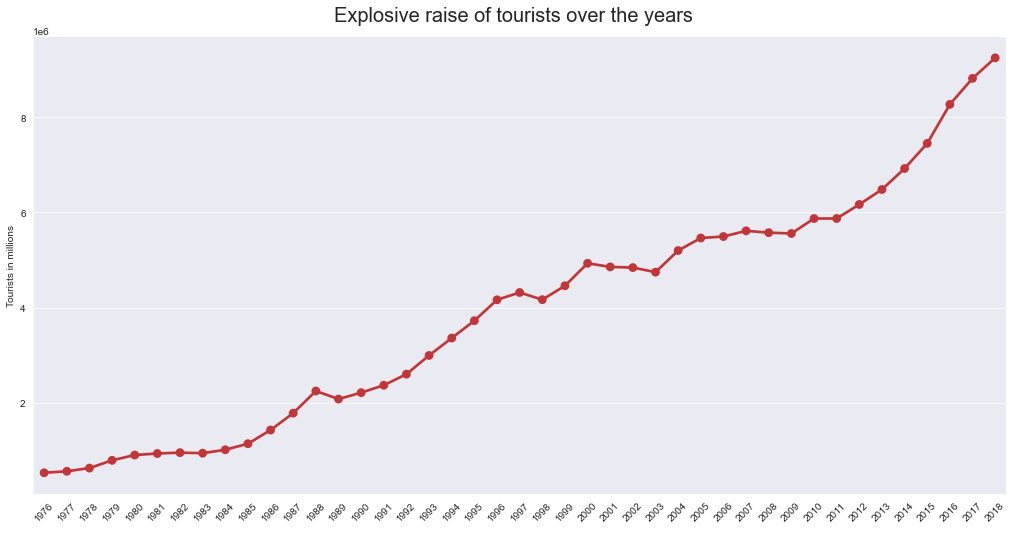

In [128]:
sns.set_style("darkgrid")
sns.set_palette("RdBu")
g = sns.catplot(
    x="year",
    y="short_term_visitors_arriving",
    data=au_visitors_1,
    kind="point",
    height=7,
    aspect=2,
)
g.fig.suptitle("Explosive raise of tourists over the years", y=1.02, fontsize=20)
g.set(xlabel=" ", ylabel="Tourists in millions")
plt.xticks(rotation=45)
plt.show()

### Turist growth in relation to total shark attacks

In [129]:
shark_au_year_1 = shark_au_year.copy()
shark_au_year_1 = shark_au_year_1.sort_values(by="year").reset_index()
shark_au_year_1 = shark_au_year_1.drop(columns="index")
shark_au_year_1 = shark_au_year_1.loc[137:180, :].reset_index()
shark_au_year_1 = shark_au_year_1.drop(columns="index")
shark_au_year_1 = shark_au_year_1.rename(columns={"total": "total_attacks"})
shark_au_year_1["growth_relation_previous_year_attacks"] = round(
    ((shark_au_year_1["total_attacks"] / shark_au_year_1["total_attacks"].shift()) - 1)
    * 100,
    0,
)
shark_au_year_1["growth_relation_previous_year_attacks"].fillna(0, inplace=True)
shark_au_year_1.tail()

,year,total_attacks,growth_relation_previous_year_attacks
38,2014,29,45.0
39,2015,31,7.0
40,2016,32,3.0
41,2017,24,-25.0
42,2018,23,-4.0


In [130]:
au_visitors_2 = au_visitors_1.copy()
shark_au_year_2 = shark_au_year_1.copy()

# convert columns to integer
au_visitors_2["short_term_visitors_arriving"] = au_visitors_2[
    "short_term_visitors_arriving"
].astype(int)
au_visitors_2["year"] = au_visitors_2["year"].astype(int)
shark_au_year_2["year"] = shark_au_year_2["year"].astype(int)
shark_au_year_2["total_attacks"] = shark_au_year_2["total_attacks"].astype(int)

# merge table with number of tourists and table with total shark attacks, based on year
shark_tourism = pd.merge(
    shark_au_year_2, au_visitors_2, left_on="year", right_on="year"
)
shark_tourism = shark_tourism.rename(
    columns={
        "short_term_visitors_arriving": "short_term_visitors",
        "growth_relation_previous_year": "growth_relation_previous_year_visitors",
    }
)

In [131]:
# growth relations between attacks and amount of visitors
shark_tourism = shark_tourism.sort_values(
    by="total_attacks", ascending=False
).reset_index()
shark_tourism = shark_tourism.drop(columns="index")
shark_tourism

,year,total_attacks,growth_relation_previous_year_attacks,short_term_visitors,growth_relation_previous_year_visitors
0,2016,32,3.0,8269340,11.00
1,2015,31,7.0,7449780,7.62
2,2014,29,45.0,6922350,6.80
3,2009,28,40.0,5557360,-0.31
4,2012,26,30.0,6167110,5.02
5,2017,24,-25.0,8815300,6.60
6,2018,23,-4.0,9245620,4.88
7,2005,21,24.0,5462830,5.06
8,2013,20,-23.0,6481700,5.10
9,2011,20,11.0,5872310,0.01


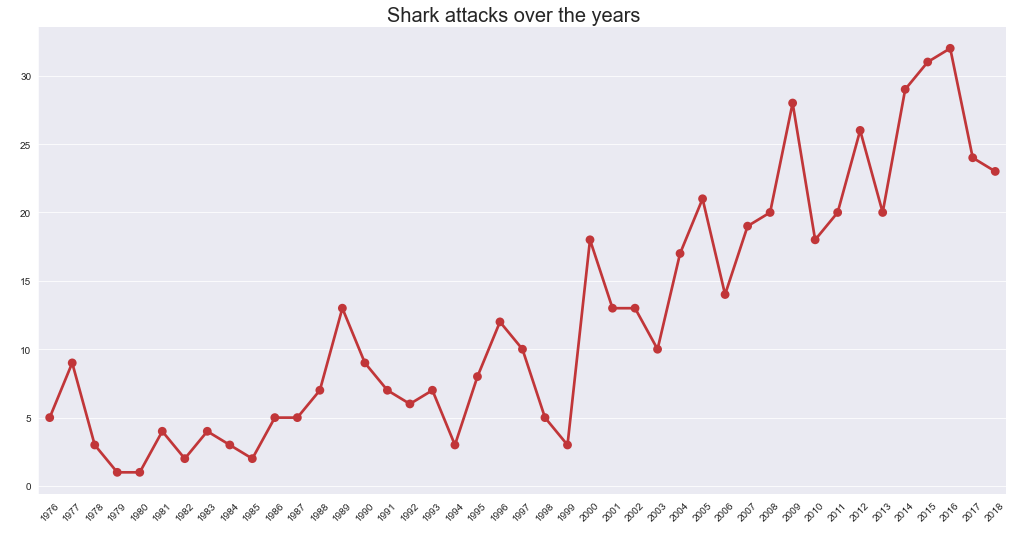

In [132]:
sns.set_style("darkgrid")
sns.set_palette("RdBu")
g = sns.catplot(
    x="year", y="total_attacks", data=shark_tourism, kind="point", height=7, aspect=2,
)
g.fig.suptitle("Shark attacks over the years", y=1.02, fontsize=20)
g.set(xlabel=" ", ylabel=" ")
plt.xticks(rotation=45)
plt.show()

## Top 20 beaches in Australia

In [133]:
# read data
au_top_beaches = pd.read_csv("./assets/au_top_beaches.csv", sep=",")
au_top_beaches = au_top_beaches.drop(columns="Unnamed: 0")
au_top_beaches

,beach,state,country,location
0,cabarita beach,new south wales,australia,"cabarita beach, new south wales, australia"
1,currumbin beach,queensland,australia,"currumbin beach, queensland, australia"
2,minnamurra beach,new south wales,australia,"minnamurra beach, new south wales, australia"
3,maria island,tasmania,australia,"maria island, tasmania, australia"
4,cape tribulation,queensland,australia,"cape tribulation, queensland, australia"
5,brighton beach,victoria,australia,"brighton beach, victoria, australia"
6,betty's beach,western australia,australia,"betty's beach, western australia, australia"
7,southport beach,south australia,australia,"southport beach, south australia, australia"
8,wagga wagga,new south wales,australia,"wagga wagga, new south wales, australia"
9,lake mckenzie,queensland,australia,"lake mckenzie, queensland, australia"


```python
# run geopy on 'au_top_beaches' to get coordinates
nom = Nominatim(user_agent="shark")
geopy.geocoders.options.default_user_agent = "shark"
au_top_beaches["coordinates"] = au_top_beaches["location"].apply(nom.geocode)

# export for backup
au_top_beaches.to_csv("./assets/au_backup/au_top_beaches_coord.csv", sep=",")
```

In [134]:
au_top_beaches_coord = pd.read_csv(
    "./assets/au_backup/au_top_beaches_coord.csv", sep=","
)
au_top_beaches_coord = au_top_beaches_coord.drop(columns="Unnamed: 0")
au_top_beaches_coord

,beach,state,country,location,coordinates
0,cabarita beach,new south wales,australia,"cabarita beach, new south wales, australia","Cabarita Beach, Tweed Shire Council, New South Wales, 24..."
1,currumbin beach,queensland,australia,"currumbin beach, queensland, australia","Currumbin Alley beach, Currumbin, Gold Coast City, Queen..."
2,minnamurra beach,new south wales,australia,"minnamurra beach, new south wales, australia","Minnamurra, The Council of the Municipality of Kiama, Ne..."
3,maria island,tasmania,australia,"maria island, tasmania, australia","Maria Island, Glamorgan-Spring Bay, Tasmania, Australia"
4,cape tribulation,queensland,australia,"cape tribulation, queensland, australia","Cape Tribulation, Douglas Shire, Queensland, Australia"
5,brighton beach,victoria,australia,"brighton beach, victoria, australia","Brighton Beach, Station Walk, Brighton, Brighton East, M..."
6,betty's beach,western australia,australia,"betty's beach, western australia, australia","Bettys Beach, Manypeaks, City Of Albany, Western Austral..."
7,southport beach,south australia,australia,"southport beach, south australia, australia",NaN
8,wagga wagga,new south wales,australia,"wagga wagga, new south wales, australia","Wagga Wagga City Council, New South Wales, Australia"
9,lake mckenzie,queensland,australia,"lake mckenzie, queensland, australia","Lake McKenzie, Fraser Island, Fraser Coast Regional, Que..."


```python
# create function to deal with missing data ('NoneType' object) from geopy
def lat_au(x):
    try:
        return x.latitude
    except:
        return "unknown"


def long_au(x):
    try:
        return x.longitude
    except:
        return "unknown"


# create columns to isolate 'latitude' and 'longitude' from aquired coordinates
au_top_beaches_coord["latitude"] = au_top_beaches_coord["coordinates"].apply(lat_au)
au_top_beaches_coord["longitude"] = au_top_beaches_coord["coordinates"].apply(long_au)

# drop columns
au_top_beaches_coord = au_top_beaches_coord.drop(["location", "coordinates"], axis=1)

# export for backup
au_top_beaches_coord.to_csv("./assets/au_backup/au_top_beaches_coord_1.csv", sep=",")
```

In [135]:
au_top_beaches_coord_1 = pd.read_csv(
    "./assets/au_backup/au_top_beaches_coord_1.csv", sep=","
)
au_top_beaches_coord_1 = au_top_beaches_coord_1.drop(columns="Unnamed: 0")
au_top_beaches_coord_1

,beach,state,country,latitude,longitude
0,cabarita beach,new south wales,australia,-28.3309421,153.5701894
1,currumbin beach,queensland,australia,-28.1281709,153.4836375194894
2,minnamurra beach,new south wales,australia,-34.6280742,150.8563805
3,maria island,tasmania,australia,-42.655839799999995,148.10102607816566
4,cape tribulation,queensland,australia,-16.0887845,145.4622111
5,brighton beach,victoria,australia,-37.9265062,144.9890551
6,betty's beach,western australia,australia,-34.9363691,118.20798515663368
7,southport beach,south australia,australia,unknown,unknown
8,wagga wagga,new south wales,australia,-35.115,147.3677778
9,lake mckenzie,queensland,australia,-25.4481325,153.05962234458138


In [136]:
# filling "unknown" values

# Southport Beach
au_top_beaches_coord_1.latitude[7] = -35.1577032
au_top_beaches_coord_1.longitude[7] = 138.4688872

# Cossies Beach (recently renamed, formely named "Direction Island")
au_top_beaches_coord_1.latitude[15] = -12.088864
au_top_beaches_coord_1.longitude[15] = 96.883225

In [137]:
# final dataset for analysis
au_top_beaches_df = au_top_beaches_coord_1.copy()

# export for backup
au_top_beaches_df.to_csv("./assets/au_backup/au_top_beaches_df.csv", sep=",")

au_top_beaches_df

,beach,state,country,latitude,longitude
0,cabarita beach,new south wales,australia,-28.3309421,153.5701894
1,currumbin beach,queensland,australia,-28.1281709,153.4836375194894
2,minnamurra beach,new south wales,australia,-34.6280742,150.8563805
3,maria island,tasmania,australia,-42.655839799999995,148.10102607816566
4,cape tribulation,queensland,australia,-16.0887845,145.4622111
5,brighton beach,victoria,australia,-37.9265062,144.9890551
6,betty's beach,western australia,australia,-34.9363691,118.20798515663368
7,southport beach,south australia,australia,-35.157703,138.468887
8,wagga wagga,new south wales,australia,-35.115,147.3677778
9,lake mckenzie,queensland,australia,-25.4481325,153.05962234458138


# Finally, where to build a 'Shark-free' Hotel & Resort ?

### Map of Australia with shark attacks located

<div>
    <img src="./images/au_attacks_all_2.jpg" width="900"/>
</div>

[Image source](https://earth.google.com/)

### Cleaned dataset

In [138]:
shark_au_df

,year,month,type,sex,age,fatal,area,location,sum,latitude,longitude,link
0,2018,6,unprovoked,Male,unknown,No,new south wales,arrawarra headland,1.0,-30.060426,153.2016851,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
1,2018,6,unprovoked,Male,unknown,No,new south wales,"flat rock, ballina",1.0,-28.8429552,153.6079901360164,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
2,2018,5,provoked,Male,32,No,queensland,cairns aquarium,1.0,-16.9186011,145.77365282675595,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
3,2018,5,provoked,Female,34,No,western australia,dugong bay,1.0,-16.39813,123.87075,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
4,2018,5,unclear,Male,unknown,No,new south wales,"sharpes beach, ballina",3.0,-28.83757345,153.60440400883255,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
...,...,...,...,...,...,...,...,...,...,...,...,...
1329,1905,0,unprovoked,Male,unknown,Yes,unknown,unknown,unknown,unknown,unknown,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1330,1905,0,unprovoked,Male,unknown,Yes,unknown,unknown,unknown,unknown,unknown,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1331,1905,0,unprovoked,Male,unknown,Yes,unknown,unknown,unknown,unknown,unknown,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...
1332,1902,0,unprovoked,Male,unknown,Yes,new south wales,,1.0,-24.7761086,134.755,http://sharkattackfile.net/spreadsheets/pdf_directory/ND...


### So, out there, one can find a shark-free beach???

<div>
    <img src="./images/au_lake_tyers_beach_4_1.jpg" width="800"/>
</div>

[Image source](https://earth.google.com/)

### Comparing last 20 and 40 years of shark attacks near to Lake Tyers Beach, Victoria State

In [139]:
shark_au_40 = shark_au_df.loc[0:512,:]

In [140]:
shark_au_40_dumm = pd.get_dummies(shark_au_40, columns=["sex", "fatal", "type"])

In [141]:
shark_au_40_dumm_1 = shark_au_40_dumm.groupby("area").sum()
shark_au_40_dumm_1.drop(columns=["month", "sex_Missing", "fatal_Missing", "type_unclear"], inplace=True)
shark_au_40_dumm_1 = shark_au_40_dumm_1[["sex_Female", "sex_Male", "type_provoked", "type_unprovoked", "fatal_Yes", "fatal_No"]]
shark_au_40_dumm_1 = shark_au_40_dumm_1.T
shark_au_40_dumm_1.drop(columns=["cocos islands", "south australia", "tasmania", "northern territory", "western australia", "unknown"], inplace=True)

In [142]:
shark_au_20 = shark_au_df.loc[0:398,:]

In [143]:
shark_au_20_dumm = pd.get_dummies(shark_au_20, columns=["sex", "fatal", "type"])

In [144]:
shark_au_20_dumm_1 = shark_au_20_dumm.groupby("area").sum()
shark_au_20_dumm_1.drop(columns=["month", "sex_Missing", "fatal_Missing", "type_unclear"], inplace=True)
shark_au_20_dumm_1 = shark_au_20_dumm_1[["sex_Female", "sex_Male", "type_provoked", "type_unprovoked", "fatal_Yes", "fatal_No"]]
shark_au_20_dumm_1 = shark_au_20_dumm_1.T
shark_au_20_dumm_1.drop(columns=["cocos islands", "south australia", "tasmania", "western australia", "unknown", "northern territory"], inplace=True)

In [145]:
df1_styler = (
    shark_au_40_dumm_1    
    .style.set_table_attributes("style='display:inline'")
    .set_caption("40 years term (1979-2018)")
)
df2_styler = (
    shark_au_20_dumm_1
    .style.set_table_attributes("style='display:inline'")
    .set_caption("20 years term (1999-2018)")
)

space = "\xa0" * 10
display_html(
    df1_styler._repr_html_()
    + space
    + df2_styler._repr_html_(),
    raw=True,
)

area,new south wales,queensland,victoria
sex_Female,17,18,3
sex_Male,159,89,30
type_provoked,11,15,6
type_unprovoked,144,78,23
fatal_Yes,8,12,0
fatal_No,161,86,33
area,new south wales,queensland,victoria
sex_Female,12,12,3
sex_Male,139,55,24
type_provoked,10,9,6


### Map

<div>
    <img src="./images/au_attacks_20_2.jpg" width="500"/>
    <img src="./images/au_attacks_40_2.jpg" width="500"/>
</div>

[Image source](https://earth.google.com/)

### Distance from registered shark attacks to Lake Tyers Beach

<div>
    <img src="./images/au_lake_tyers_beach_dist_2.jpg" width="1000"/>
</div>

[Image source](https://earth.google.com/)

In [146]:
# showing index #112 – 70km linear distance to Lake Tyers Beach

shark_au_df[shark_au_df.index == 112]

,year,month,type,sex,age,fatal,area,location,sum,latitude,longitude,link
112,2014,12,provoked,Male,45,No,victoria,paradise beach,1.0,-38.1893528,147.4240851,http://sharkattackfile.net/spreadsheets/pdf_directory/20...


In [147]:
# showing index #287 – 170km linear distance to Lake Tyers Beach

shark_au_df[shark_au_df.index == 287]

,year,month,type,sex,age,fatal,area,location,sum,latitude,longitude,link
287,2007,1,unprovoked,Male,41,No,new south wales,cape howe,1.0,-37.5045,149.977,http://sharkattackfile.net/spreadsheets/pdf_directory/20...


### Backed up by data analysis

WORLDWIDE

- Based on 230 years of available data, Australia is the second country in the world with most shark attacks (1338); behind USA (2229) and before Mexico (579).

- Top 3 countries come up with 65% of all incidents.

- 22% end up deadly.

- Almost 90% of attacked individuals are male.



AUSTRALIA

- In almost 85% of all fatalities, it was possible to locate the coordinates.

- Number of tourists exploded in the last 40 years: over 200% rise from 1990 to 1997 and almost 170% from 2010 to 2018.

- So did shark attacks, top 10 years included: 2016, 2015, 2014, 2009, 2012, 2017 and 2018.

- For a "small" State, Victoria has almost 20% of total Hotels in Australia. And the best room occupancy rate among them all, over 70%.

- Among the top 3 States, only in Victoria there haven't been any deadly shark attacks in the past 40 years.

- Lake Tyers Beach is a top 20 beach in Australia!

### Conclusion

- Despite a full coast with shark attacks, there is a `shark free` area in Victoria State.

- It's named `Lake Tyers Beach` and is also a top 20 beach in Australia! Ranked #16.

- Therefore a `safe` place for `Shark-free Hotels & Resorts` to start hosting in Australia.

### Next steps

- Pick the exact location according to national and local authorities regulation.

- Add meaningful graphs using the already analysed data.

- Analyse demographic, economic, financial, geographic and market factors to deliver effective data-driven feasibility studies.

# DF for Google Earth Pro

In [148]:
no_values = (
    shark_au_df[shark_au_df["fatal"] == "No"]
    .groupby(["area"])
    .agg(no=("fatal", "count"))
)
yes_values = (
    shark_au_df[shark_au_df["fatal"] == "Yes"]
    .groupby(["area"])
    .agg(yes=("fatal", "count"))
)
missing_values = (
    shark_au_df[shark_au_df["fatal"] == "Missing"]
    .groupby(["area"])
    .agg(missing=("fatal", "count"))
)

In [149]:
area_fatal = pd.concat([no_values, yes_values, missing_values], axis=1)

In [150]:
area_fatal

,no,yes,missing
area,,,
cocos islands,1,NaN,NaN
new south wales,333,99.0,53.0
norfolk island,1,NaN,NaN
northern territory,17,3.0,3.0
queensland,255,99.0,28.0
south australia,73,25.0,6.0
tasmania,26,7.0,8.0
unknown,7,6.0,1.0
victoria,66,14.0,12.0


In [151]:
au_area_fatal = pd.merge(au_area_sum, area_fatal, left_on="area", right_on="area")

In [152]:
au_area_fatal

,area,sum,latitude,longitude,no,yes,missing
0,new south wales,485,-31.875984,147.286949,333,99.0,53.0
1,queensland,382,-22.164678,144.584490,255,99.0,28.0
2,western australia,191,-25.230300,121.018725,139,29.0,23.0
3,south australia,104,-30.534367,135.630121,73,25.0,6.0
4,victoria,92,-36.598610,144.678005,66,14.0,12.0
5,tasmania,41,-42.035067,146.636689,26,7.0,8.0
6,northern territory,23,-19.851610,133.230337,17,3.0,3.0
7,unknown,14,37.596094,127.906214,7,6.0,1.0
8,norfolk island,1,-29.028958,167.958729,1,NaN,NaN
9,cocos islands,1,-12.141876,96.867707,1,NaN,NaN


In [153]:
au_area_fatal.fillna(0, inplace=True)
au_area_fatal.yes = au_area_fatal.yes.astype(int)
au_area_fatal.missing = au_area_fatal.missing.astype(int)

In [154]:
au_area_fatal.drop(["sum"], axis=1, inplace=True)

In [155]:
au_area_fatal["sum"] = au_area_fatal.no + au_area_fatal.yes + au_area_fatal.missing

In [156]:
au_area_fatal

,area,latitude,longitude,no,yes,missing,sum
0,new south wales,-31.875984,147.286949,333,99,53,485
1,queensland,-22.164678,144.584490,255,99,28,382
2,western australia,-25.230300,121.018725,139,29,23,191
3,south australia,-30.534367,135.630121,73,25,6,104
4,victoria,-36.598610,144.678005,66,14,12,92
5,tasmania,-42.035067,146.636689,26,7,8,41
6,northern territory,-19.851610,133.230337,17,3,3,23
7,unknown,37.596094,127.906214,7,6,1,14
8,norfolk island,-29.028958,167.958729,1,0,0,1
9,cocos islands,-12.141876,96.867707,1,0,0,1


In [157]:
au_area_fatal["no/sum"] = (
    round(au_area_fatal["yes"] / au_area_fatal["sum"], 2) * 100
).astype(int)

In [158]:
au_area_fatal["yes/sum"] = (
    round(au_area_fatal["no"] / au_area_fatal["sum"], 2) * 100
).astype(int)

In [159]:
au_area_fatal["missing/sum"] = (
    round(au_area_fatal["missing"] / au_area_fatal["sum"], 2) * 100
).astype(int)

In [160]:
au_area_fatal

,area,latitude,longitude,no,yes,missing,sum,no/sum,yes/sum,missing/sum
0,new south wales,-31.875984,147.286949,333,99,53,485,20,69,11
1,queensland,-22.164678,144.584490,255,99,28,382,26,67,7
2,western australia,-25.230300,121.018725,139,29,23,191,15,73,12
3,south australia,-30.534367,135.630121,73,25,6,104,24,70,6
4,victoria,-36.598610,144.678005,66,14,12,92,15,72,13
5,tasmania,-42.035067,146.636689,26,7,8,41,17,63,20
6,northern territory,-19.851610,133.230337,17,3,3,23,13,74,13
7,unknown,37.596094,127.906214,7,6,1,14,43,50,7
8,norfolk island,-29.028958,167.958729,1,0,0,1,0,100,0
9,cocos islands,-12.141876,96.867707,1,0,0,1,0,100,0


# Sources

1. Given dataset

   + Global Shark Attacks: [@kaggle.com](https://www.kaggle.com/teajay/global-shark-attacks/version/1).


2. Extra datasets used

   - Number of movements <i>Short-term Visitors arriving</i> in Australia: [Australian Bureau of Statistics](https://www.abs.gov.au/statistics/industry/tourism-and-transport/overseas-arrivals-and-departures-australia/latest-release#data-download).
   - Information on the supply of, and demand for, tourist accommodation facilities in Australia: [Australian Bureau of Statistics](https://www.abs.gov.au/statistics/industry/tourism-and-transport/tourist-accommodation-australia/latest-release).
   - Australia cities database: [@kaggle.com](https://www.kaggle.com/maryamalizadeh/worldcities-australia).


3. Created datasets based on

   - List of beaches in Australia: [Wikipedia](https://en.wikipedia.org/wiki/List_of_beaches_in_Australia).
   - Brad Farmer's 101 Best Australian Beaches: [Traveller](https://www.traveller.com.au/brad-farmers-101-best-australian-beaches-australias-top-101-beaches-to-visit-in-2020-revealed-h1kbwi).